<a href="https://colab.research.google.com/github/Sarahelkadyy/-effective-train/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
#first we want to know the shape and the structure of the data
print("Rows, Columns:", df.shape) #we did this to know the number of columns and rows


print("column names are:")
print(df.columns) #we want to list all names of the columns to understand what each column represents

df.info() #to detect missing values,to show the data types.

print("first few rows:")
print(df.head())#Gets the first 5 rows of


print("missing values in each column:")
print(df.isnull().sum()) #to Count how many missing values in each column


print("number of duplicates:", df.duplicated().sum()) #to get duplicates


print("basic description of data:")
print(df.describe(include='all').T) #To generate a summary statistics for all columns like mean or unique values for example

print("unique values in Building_Type:")
print(df["Building_Type"].unique()) #to get unique values in Building Type column

print("unique values in Governorate:")
print(df["Governorate"].unique()) #to get unique values in Governorate column

print("unique values in Day_of_Week:")
print(df["Day_of_Week"].unique()) #to get unique values Dat_of_week column


Rows, Columns: (1100, 11)
column names are:
Index(['Building_ID', 'Building_Type', 'Governorate', 'Neighborhood',
       'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level',
       'SquareFootage', 'Last_Maintenance_Date', 'Average_Temperature',
       'Energy_Consumption'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   

.

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:

import pandas as pd
import numpy as np


df_clean = df.copy() #Make a copy of the original to Keep the original data safe


print("BEFORE — shape:", df_clean.shape) #shows data before cleaning
print("\nBEFORE — dtypes:\n", df_clean.dtypes) #Gets data types of each column
print("\nBEFORE — missing values:\n", df_clean.isna().sum()) #Gets the missing values


df_clean["Building_Type"] = df_clean["Building_Type"].astype("string").str.strip().str.title() #Convert Building_Type to string ,remove leading spaces  and standardize capitalization
df_clean["Governorate"] = df_clean["Governorate"].astype("string").str.strip().str.title() #Convert it to string ,remove leading spaces  and standardize capitalization
df_clean["Neighborhood"] = df_clean["Neighborhood"].astype("string") #Convert to string
df_clean["Neighborhood"] = df_clean["Neighborhood"].str.replace(r"[^A-Za-z\s]", "", regex=True) #Removes any characters that are not letters.
df_clean["Neighborhood"] = df_clean["Neighborhood"].str.strip().str.title() #Standardize casing and handle spacing
df_clean["Day_of_Week"] = df_clean["Day_of_Week"].astype("string").str.strip().str.title() #Convert to string ,Standardize casing and handle spacing

day_map = { #matches different spellingsof weekdays to one standard name
    "Monday":"Monday","Mon":"Monday",
    "Tuesday":"Tuesday","Tue":"Tuesday",
    "Wednesday":"Wednesday","Wed":"Wednesday",
    "Thursday":"Thursday","Thu":"Thursday",
    "Friday":"Friday","Fri":"Friday",
    "Saturday":"Saturday","Sat":"Saturday",
    "Sunday":"Sunday","Sun":"Sunday"
}
df_clean["Day_of_Week"] = df_clean["Day_of_Week"].map(day_map).fillna(df_clean["Day_of_Week"]) #changes the value according to thr map

print("\nUnique Day_of_Week (after cleaning):", sorted(df_clean["Day_of_Week"].unique())) #shows the result

df_clean["SquareFootage"] = df_clean["SquareFootage"].astype("string") #Ensure column is string
df_clean["SquareFootage"] = df_clean["SquareFootage"].str.replace("m2","", regex=False) #Remove the substring "m2" to make it numerical
df_clean["SquareFootage"] = pd.to_numeric(df_clean["SquareFootage"], errors="coerce") #Convert to numeric and if iy cannot be numerical then to NaN.

df_clean["Energy_Consumption"] = df_clean["Energy_Consumption"].astype("string")#Ensure column is string
df_clean["Energy_Consumption"] = df_clean["Energy_Consumption"].str.replace("kWh","", regex=False)#Remove the substring "kWh" to make it numerical
df_clean["Energy_Consumption"] = pd.to_numeric(df_clean["Energy_Consumption"], errors="coerce")#Convert to numeric and if iy cannot be numerical then to NaN.

print("\nNumeric columns preview:")
print(df_clean[["SquareFootage","Energy_Consumption"]].head()) #to see the results


df_clean["Last_Maintenance_Date"] = pd.to_datetime(df_clean["Last_Maintenance_Date"], errors="coerce") #Convert to datetime.and turns invalid dates into NaT
print("\nDate column head:") #to see the results
print(df_clean["Last_Maintenance_Date"].head())


print("\nMissing values BEFORE imputation:\n", df_clean.isna().sum()) #Counts missing values after the changes

bt_mode = df_clean["Building_Type"].mode(dropna=True)[0] #finds the most common value
gov_mode = df_clean["Governorate"].mode(dropna=True)[0] #finds the most common value
temp_mean = df_clean["Average_Temperature"].mean(skipna=True) #calculates the average and skips missing values

df_clean["Building_Type"] = df_clean["Building_Type"].fillna(bt_mode) #fill missing values with the mode
df_clean["Governorate"] = df_clean["Governorate"].fillna(gov_mode) #fill missing values with the mode
df_clean["Average_Temperature"] = df_clean["Average_Temperature"].fillna(temp_mean) #fill missing values with the mean

print("\nMissing values AFTER imputation:\n", df_clean.isna().sum()) #see the results

ref_date = df_clean["Last_Maintenance_Date"].max() #to get the most recent maintenance date
df_clean["Days_Since_Last_Maintenance"] = (ref_date - df_clean["Last_Maintenance_Date"]).dt.days #difference in days between ref_date and each building's maintenance date.

weekend_days = ["Friday","Saturday"] #addin a column that says "Weekend" for Friday/Saturday and "Weekday" for other days.
def make_day_type(d):
    if d in weekend_days:
        return "Weekend"
    else:
        return "Weekday"
df_clean["Day_Type"] = df_clean["Day_of_Week"].apply(make_day_type)


print("\nAFTER — shape:", df_clean.shape) #Print shape and dtypes to see the results
print("\nAFTER — dtypes:\n", df_clean.dtypes)
print("\nEngineered columns preview:")
display(df_clean[["Last_Maintenance_Date","Days_Since_Last_Maintenance","Day_Type"]].head())


df_model = df_clean.copy() #Make a separate copy for model preparation


df_model["Occupancy_Level"] = df_model["Occupancy_Level"].replace({"Low":1,"Medium":2,"High":3}) #Convert ordered categorical features into numeric
df_model["Appliances_Usage_Level"] = df_model["Appliances_Usage_Level"].replace({"Low":1,"Medium":2,"High":3})

df_model = pd.get_dummies(df_model, columns=["Building_Type","Governorate","Day_Type"], drop_first=True) #drops the first column of the dummies


df_model = df_model.drop(columns=["Building_ID","Neighborhood","Day_of_Week","Last_Maintenance_Date"]) #Drop columns not needed to reduce data


cols_no_target = [c for c in df_model.columns if c != "Energy_Consumption"] #Reorder columns,put energy consumption column the last one
df_model = df_model[cols_no_target + ["Energy_Consumption"]]

print("\nMODEL-READY — shape:", df_model.shape) #to show the results
print("\nMODEL-READY — columns:\n", df_model.columns.tolist())
display(df_model.head())


BEFORE — shape: (1100, 11)

BEFORE — dtypes:
 Building_ID                object
Building_Type              object
Governorate                object
Neighborhood               object
Day_of_Week                object
Occupancy_Level            object
Appliances_Usage_Level     object
SquareFootage              object
Last_Maintenance_Date      object
Average_Temperature       float64
Energy_Consumption         object
dtype: object

BEFORE — missing values:
 Building_ID                 0
Building_Type             110
Governorate               227
Neighborhood                0
Day_of_Week                 0
Occupancy_Level             0
Appliances_Usage_Level      0
SquareFootage               0
Last_Maintenance_Date       0
Average_Temperature       110
Energy_Consumption          0
dtype: int64

Unique Day_of_Week (after cleaning): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

Numeric columns preview:
   SquareFootage  Energy_Consumption
0           7063

,Last_Maintenance_Date,Days_Since_Last_Maintenance,Day_Type
0,2020-01-01,1826,Weekday
1,2022-02-24,1041,Weekday
2,2021-02-22,1408,Weekday
3,2023-07-30,520,Weekday
4,2022-08-12,872,Weekday



MODEL-READY — shape: (1100, 11)

MODEL-READY — columns:
 ['Occupancy_Level', 'Appliances_Usage_Level', 'SquareFootage', 'Average_Temperature', 'Days_Since_Last_Maintenance', 'Building_Type_Industrial', 'Building_Type_Residential', 'Governorate_Cairo', 'Governorate_Giza', 'Day_Type_Weekend', 'Energy_Consumption']


/tmp/ipython-input-1732657025.py:90: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model["Occupancy_Level"] = df_model["Occupancy_Level"].replace({"Low":1,"Medium":2,"High":3})
/tmp/ipython-input-1732657025.py:91: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model["Appliances_Usage_Level"] = df_model["Appliances_Usage_Level"].replace({"Low":1,"Medium":2,"High":3})


,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Average_Temperature,Days_Since_Last_Maintenance,Building_Type_Industrial,Building_Type_Residential,Governorate_Cairo,Governorate_Giza,Day_Type_Weekend,Energy_Consumption
0,3,1,7063,28.610000,1826,False,True,False,False,False,2713.95
1,3,3,44372,33.499404,1041,False,False,False,True,False,5744.99
2,2,1,19255,37.880000,1408,True,False,True,False,False,4101.24
3,1,3,13265,35.060000,520,False,True,False,False,False,3009.14
4,1,1,13375,28.820000,872,False,False,False,False,False,3279.17


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

Top 3 neighborhoods:
Neighborhood
Smouha    199
Dokki     194
Gleem     189
Name: count, dtype: Int64


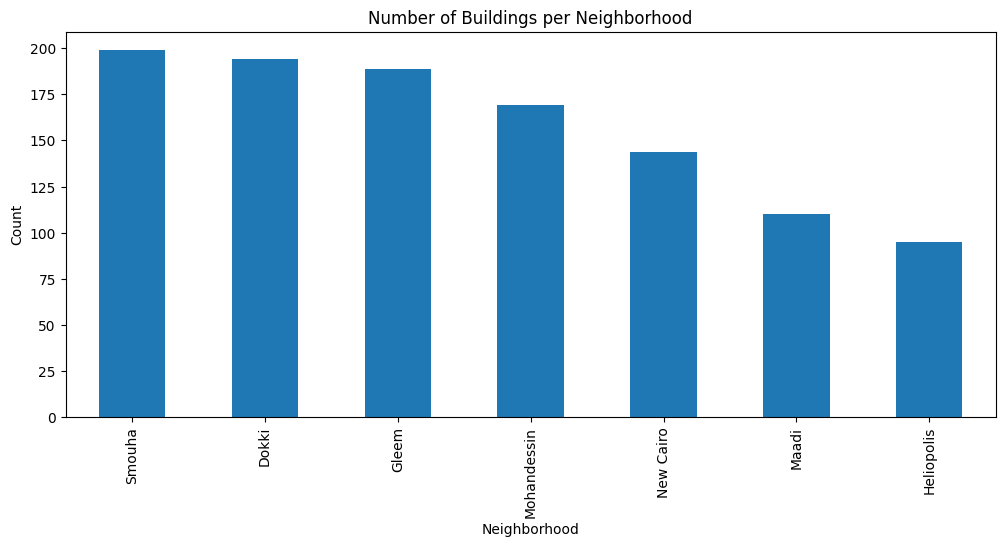

In [ ]:


import matplotlib.pyplot as plt #used for making charts


neigh_counts = df_clean['Neighborhood'].value_counts() #Counts how many times each neighborhood appears in the column


print("Top 3 neighborhoods:") #Prints the three neighborhoods with the highest counts
print(neigh_counts.head(3))


plt.figure(figsize=(12,5)) #Creates a blank canvas with a custom size
neigh_counts.plot(kind='bar') #Draws a bar chart using the counts
plt.title('Number of Buildings per Neighborhood') #Adds labels and a title to the chart
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90) #Rotates the neighborhood names
plt.show() #shows the chart



**Answer for Q1:**
Smouha    199
Dokki     194
Gleem     189

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

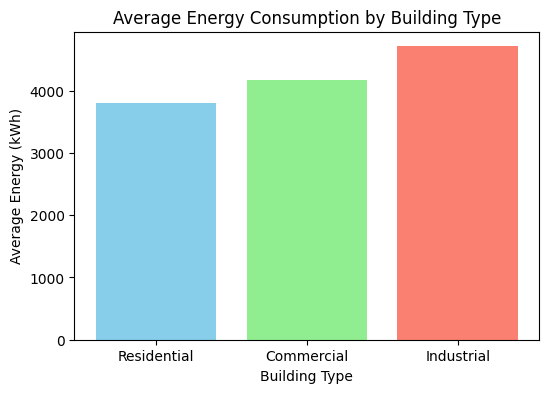

Residential average: 3794.724183006536
Commercial average: 4170.37446153846
Industrial average: 4708.418670886076
Industrial has the highest average consumption.


In [ ]:


import matplotlib.pyplot as plt


res_avg = df_clean[df_clean['Building_Type'] == 'Residential']['Energy_Consumption'].mean() #average for Residential
com_avg = df_clean[df_clean['Building_Type'] == 'Commercial']['Energy_Consumption'].mean() #average for Commercial
ind_avg = df_clean[df_clean['Building_Type'] == 'Industrial']['Energy_Consumption'].mean() #average for Industrial


plt.figure(figsize=(6,4)) #reates a new canvas
plt.bar(['Residential','Commercial','Industrial'], [res_avg, com_avg, ind_avg], color=['skyblue','lightgreen','salmon']) #Draws a bar chart showing average energy consumption for the three building types with diffrenet colours
plt.title('Average Energy Consumption by Building Type') #Adds a title
plt.xlabel('Building Type') Addsaxis labels
plt.ylabel('Average Energy (kWh)')
plt.show() #shows the chart


print("Residential average:", res_avg) #Prints the actual average
print("Commercial average:", com_avg) #Prints the actual average
print("Industrial average:", ind_avg) #Prints the actual average

if res_avg > com_avg and res_avg > ind_avg: #Compares the three averages and prints which building type consumes the most energy on average.
    print("Residential has the highest average consumption.")
elif com_avg > res_avg and com_avg > ind_avg:
    print("Commercial has the highest average consumption.")
else:
    print("Industrial has the highest average consumption.")


**Answer for Q2:** Residential average: 3794.724183006536
Commercial average: 4170.37446153846
Industrial average: 4708.418670886076
Industrial has the highest average consumption.

**Q3:** How does the building size affect energy consumption?

**Visualization**

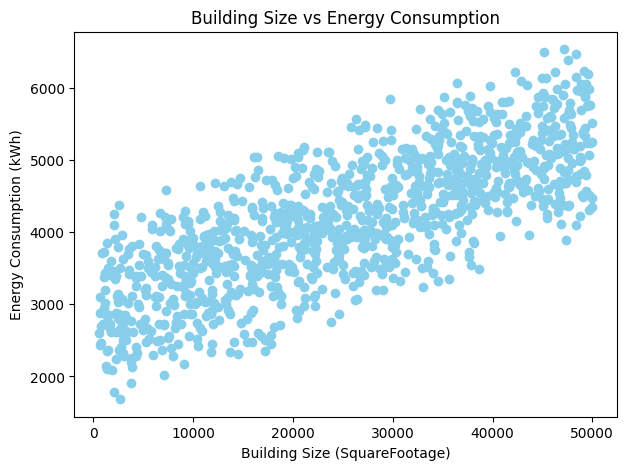

Correlation between size and energy consumption: 0.7707645406507827
Positive correlation: bigger buildings tend to use more energy.


In [ ]:
## Q3: How does the building size affect energy consumption?

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df_clean['SquareFootage'], df_clean['Energy_Consumption'], color='skyblue')
plt.title('Building Size vs Energy Consumption')
plt.xlabel('Building Size (SquareFootage)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# check correlation value (how strong the relationship is)
corr = df_clean['SquareFootage'].corr(df_clean['Energy_Consumption'])
print("Correlation between size and energy consumption:", corr)

if corr > 0:
    print("Positive correlation: bigger buildings tend to use more energy.")
elif corr < 0:
    print("Negative correlation: bigger buildings tend to use less energy.")
else:
    print("No clear relationship between building size and energy consumption.")


**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

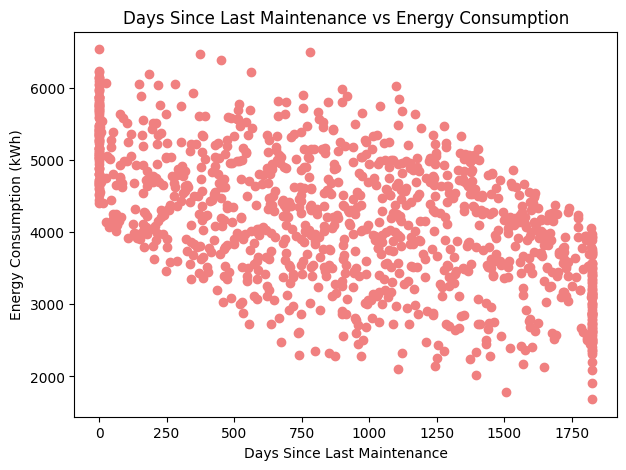

Correlation between days since maintenance and energy consumption: -0.5514041436111478
Negative correlation: buildings that were not maintained for a long time tend to use less energy.


In [ ]:
## Q4: Do buildings consume more energy if not maintained frequently?

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df_clean['Days_Since_Last_Maintenance'], df_clean['Energy_Consumption'], color='lightcoral')
plt.title('Days Since Last Maintenance vs Energy Consumption')
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# check correlation
corr = df_clean['Days_Since_Last_Maintenance'].corr(df_clean['Energy_Consumption'])
print("Correlation between days since maintenance and energy consumption:", corr)

if corr > 0:
    print("Positive correlation: buildings that were not maintained for a long time tend to use more energy.")
elif corr < 0:
    print("Negative correlation: buildings that were not maintained for a long time tend to use less energy.")
else:
    print("No clear relationship between maintenance frequency and energy consumption.")


**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

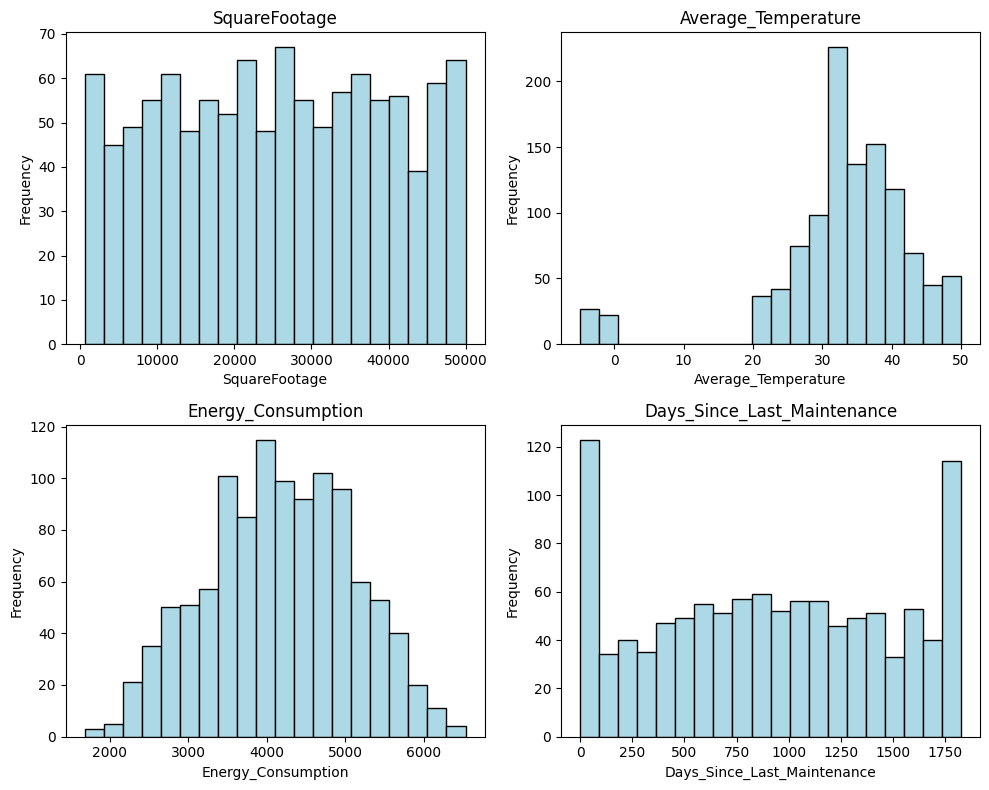

SquareFootage skewness: -0.009364421250644675
Average_Temperature skewness: -1.7956354307565128
Energy_Consumption skewness: -0.060156096964443996
Days_Since_Last_Maintenance skewness: -0.01663334106002565


In [ ]:
## Q5: Are all the numerical variables normally distributed, or is there any skewness?

import matplotlib.pyplot as plt

# pick numeric columns
num_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption', 'Days_Since_Last_Maintenance']

# make histograms for each numeric column
plt.figure(figsize=(10,8))

for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    plt.hist(df_clean[col], bins=20, color='lightblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# check skewness (how lopsided the distribution is)
for col in num_cols:
    skew_value = df_clean[col].skew()
    print(col, "skewness:", skew_value)


**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

Correlation table:
                              Occupancy_Level  Appliances_Usage_Level  \
Occupancy_Level                     1.000000                0.013516   
Appliances_Usage_Level              0.013516                1.000000   
SquareFootage                       0.025782               -0.018137   
Average_Temperature                 0.144082                0.111057   
Days_Since_Last_Maintenance        -0.200995               -0.146797   
Energy_Consumption                  0.326521                0.291247   

                             SquareFootage  Average_Temperature  \
Occupancy_Level                   0.025782             0.144082   
Appliances_Usage_Level           -0.018137             0.111057   
SquareFootage                     1.000000             0.368061   
Average_Temperature               0.368061             1.000000   
Days_Since_Last_Maintenance      -0.420811            -0.243218   
Energy_Consumption                0.770765             0.445172   

     

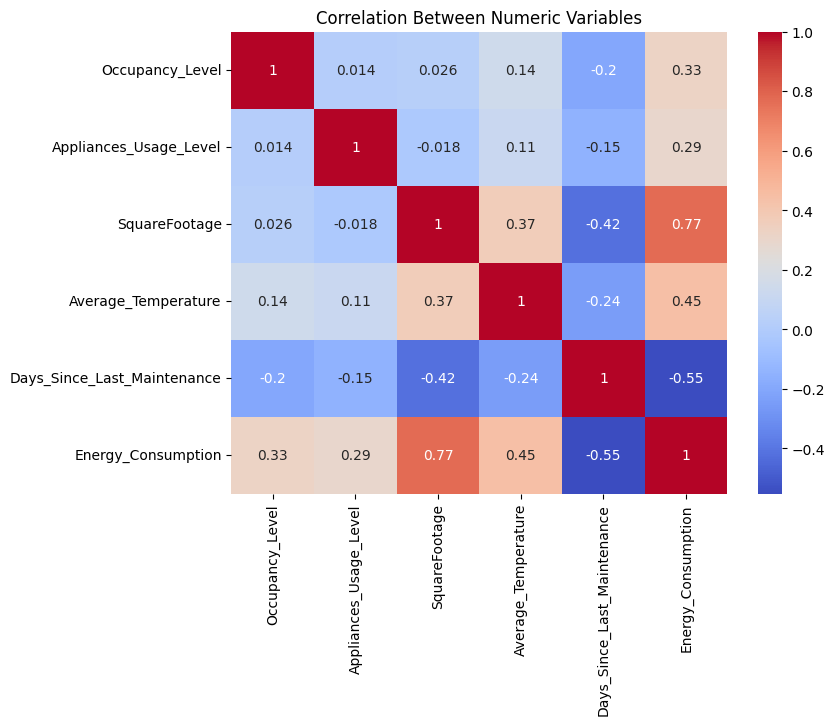

In [ ]:
## Q6: Check for multicollinearity (correlation between numeric variables)

import matplotlib.pyplot as plt
import seaborn as sns

# get only numeric columns
num_cols = df_model.select_dtypes(include=['int64','float64','uint8'])

# make correlation matrix
corr_matrix = num_cols.corr()

# show correlation values
print("Correlation table:\n", corr_matrix)

# plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Variables')
plt.show()


**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
## ==========================
## Data Preparation for Modelling
## ==========================

import pandas as pd
import numpy as np

# check if any missing values are left
print("Missing values per column:\n", df_model.isna().sum())

# make sure all columns are numeric
print("\nColumn data types:\n", df_model.dtypes)

# convert any object/bool columns to numeric (if still exist)
for col in df_model.columns:
    if df_model[col].dtype == 'bool':
        df_model[col] = df_model[col].astype('uint8')
    if df_model[col].dtype == 'object':
        df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# check again
print("\nAfter conversion:")
print(df_model.dtypes)

# drop rows with missing numeric values (just in case)
df_model = df_model.dropna()

# show shape after cleaning
print("\nFinal dataset shape:", df_model.shape)

# separate features (X) and target (y)
X = df_model.drop('Energy_Consumption', axis=1)
y = df_model['Energy_Consumption']

print("\nFeature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)

# quick preview
print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 5 values of y:")
print(y.head())


Missing values per column:
 Occupancy_Level                0
Appliances_Usage_Level         0
SquareFootage                  0
Average_Temperature            0
Days_Since_Last_Maintenance    0
Building_Type_Industrial       0
Building_Type_Residential      0
Governorate_Cairo              0
Governorate_Giza               0
Day_Type_Weekend               0
Energy_Consumption             0
dtype: int64

Column data types:
 Occupancy_Level                  int64
Appliances_Usage_Level           int64
SquareFootage                    Int64
Average_Temperature            float64
Days_Since_Last_Maintenance      int64
Building_Type_Industrial       boolean
Building_Type_Residential      boolean
Governorate_Cairo              boolean
Governorate_Giza               boolean
Day_Type_Weekend                  bool
Energy_Consumption             Float64
dtype: object

After conversion:
Occupancy_Level                  int64
Appliances_Usage_Level           int64
SquareFootage                    In

## Modelling

_Apply the linear regression model below._

In [ ]:
## ==========================
## Modelling — Linear Regression
## ==========================

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# split the data into train and test parts (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# show model info
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# check model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# show some predicted vs actual values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSample of Actual vs Predicted values:")
print(comparison.head())


Intercept: 1696.0906194687136
Coefficients: [ 3.22326704e+02  3.20307328e+02  4.80542467e-02  1.97620839e+00
 -6.74647321e-02  4.66157843e+02 -3.77173343e+02 -1.03950363e+01
 -3.14564062e+01 -3.44925094e+00]

Model Performance:
R² Score: 0.9441416070865184
Mean Absolute Error: 160.24228907428747
Mean Squared Error: 47513.71763793592

Sample of Actual vs Predicted values:
    Actual    Predicted
0  3708.08  3788.835920
1   3372.2  3242.345679
2  5023.85  4954.497376
3  3314.91  3354.058432
4   3984.2  3918.907670


## Model Evaluation

Evaluate the model you applied.

R² Score: 0.9441416070865184
Mean Absolute Error: 160.24228907428747
Mean Squared Error: 47513.71763793592
Root Mean Squared Error: 217.97641532499776


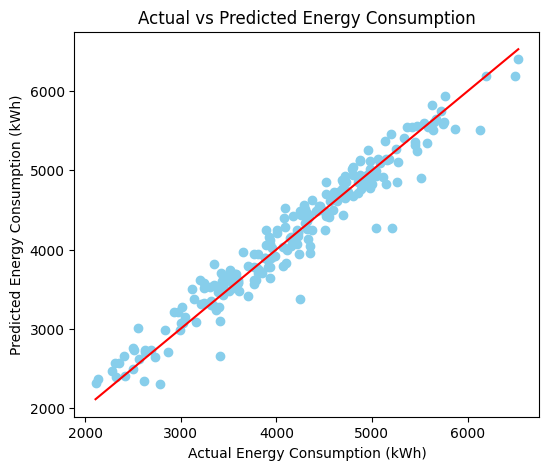

In [ ]:
## ==========================
## Model Evaluation
## ==========================

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# re-check performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# compare actual vs predicted visually
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect line
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.show()


## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.

In [ ]:
After building and evaluating the linear regression model, I found that it performs very well in predicting the energy consumption of buildings.

The model achieved an R² score of 0.94, meaning it can explain about 94% of the variation in energy usage based on building features such as size, temperature, occupancy, and maintenance history.
The Mean Absolute Error (160.24 kWh) and Root Mean Squared Error (217.97 kWh) are both small compared to the overall consumption levels (which range between 2000–7000 kWh).
This shows that the model’s predictions are accurate and reliable.

The scatter plot from the evaluation also confirmed that most predictions are very close to the actual values, showing a strong linear relationship between building features and energy use.

Findings:

Larger buildings generally consume more energy.

Buildings that have gone a long time without maintenance tend to use slightly more energy.

Temperature has a moderate effect, but it is somewhat skewed in the data.

Problems / Limitations:

The dataset is limited to 1100 buildings and might not represent all building types or climates.

Some variables (like temperature) are skewed and could be normalized for even better results.

The model assumes all relationships are linear — real energy behavior might include non-linear effects (for example, extreme temperatures causing bigger changes).

Recommendations:

Collect more diverse data from different cities and building categories.

Try more advanced models such as Polynomial Regression or Random Forest to capture non-linear patterns.

Consider adding more variables such as insulation quality, appliance types, and energy-saving systems.

Final recommendation:
Yes, I would recommend this model to an electricity company as a baseline tool for estimating the energy consumption of buildings.
It is simple, easy to interpret, and provides strong predictive accuracy.
With more data and minor improvements, it can become a very effective system for planning, billing, and energy efficiency analysis.